<a href="https://colab.research.google.com/github/Rajjaiswal-18/ProdigyDS/blob/main/PRODIGY_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')
df.rename(columns={'y': 'deposit'}, inplace=True)
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Drop irrelevant columns or handle missing values
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [ ]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


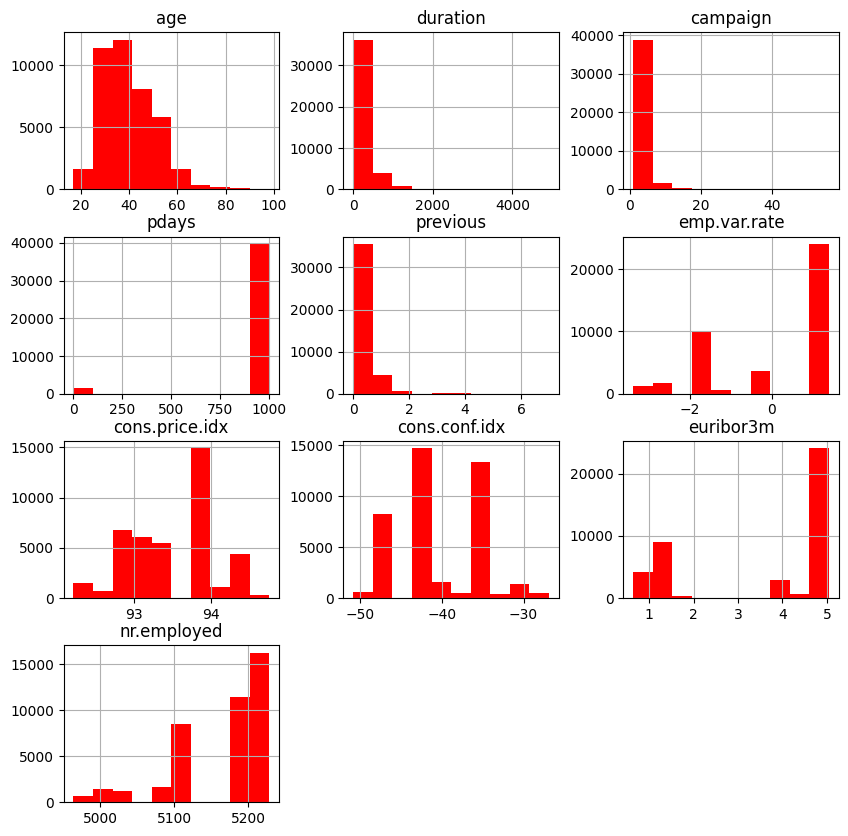

In [ ]:
df.hist(figsize=(10,10),color='red')
plt.show()

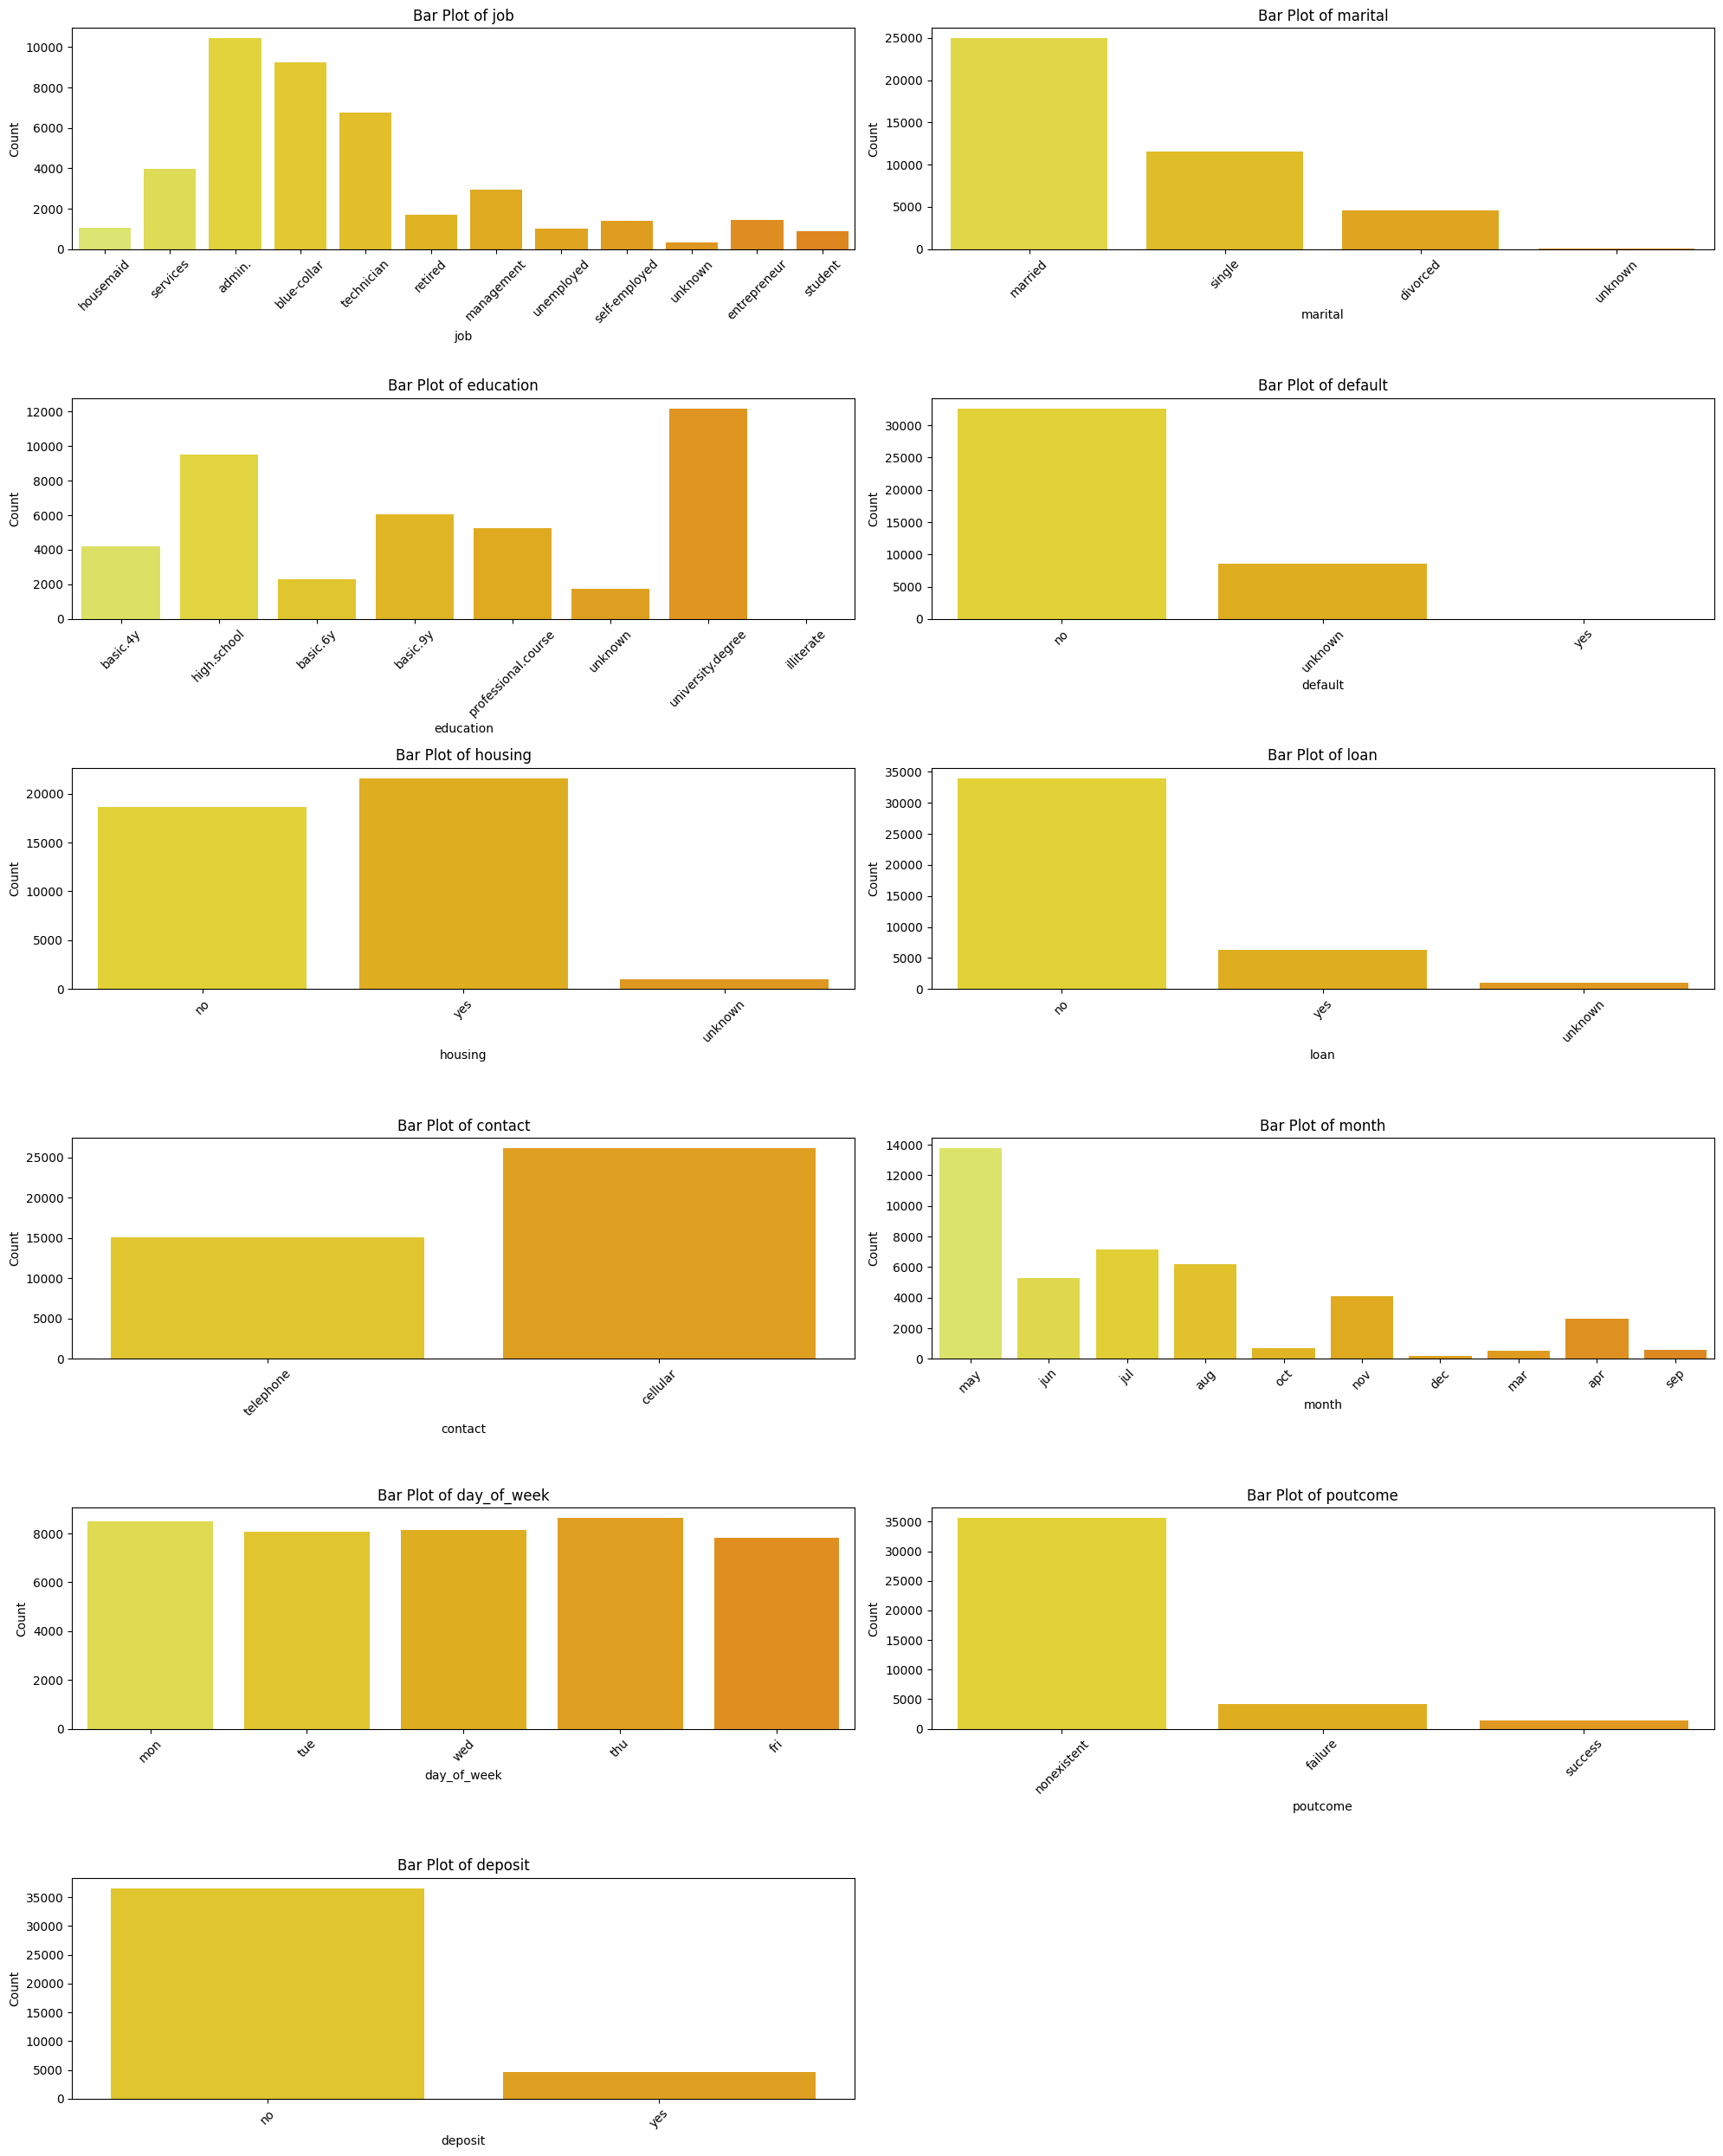

In [ ]:
# Calculate the number of rows and columns for subplots
num_plots = len(cat_cols)
num_rows = (num_plots + 1) // 2  # Add 1 and divide by 2 to round up for odd numbers
num_cols = 2

# Create a new figure
plt.figure(figsize=(20, 25))  # Adjust the figure size as needed

# Loop through each feature and create a countplot
for i, feature in enumerate(cat_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=feature, data=df, palette='Wistia')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

In [ ]:
df1 = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,...,0,26,0,1,5,25,0,171,0,1
41184,29,1,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,171,0,0
41185,39,5,1,6,0,2,0,0,7,0,...,1,26,0,1,5,25,0,171,0,0
41186,27,9,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,171,0,1


In [ ]:
df_encoded['deposit'].value_counts

In [ ]:
x = df_encoded.drop('deposit',axis=1)  # independent variable
y = df_encoded['deposit']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(41188, 20)
(41188,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30891, 20)
(10297, 20)
(30891,)
(10297,)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [ ]:
mscore(dt)

Training Score 0.916707131526982


In [ ]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 0 ... 0 0 1]


In [ ]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.9153151403321356
Confusion Matrix
 [[8852  280]
 [ 592  573]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      9132
           1       0.67      0.49      0.57      1165

    accuracy                           0.92     10297
   macro avg       0.80      0.73      0.76     10297
weighted avg       0.91      0.92      0.91     10297



In [ ]:
from sklearn.tree import plot_tree
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
['no', 'yes']


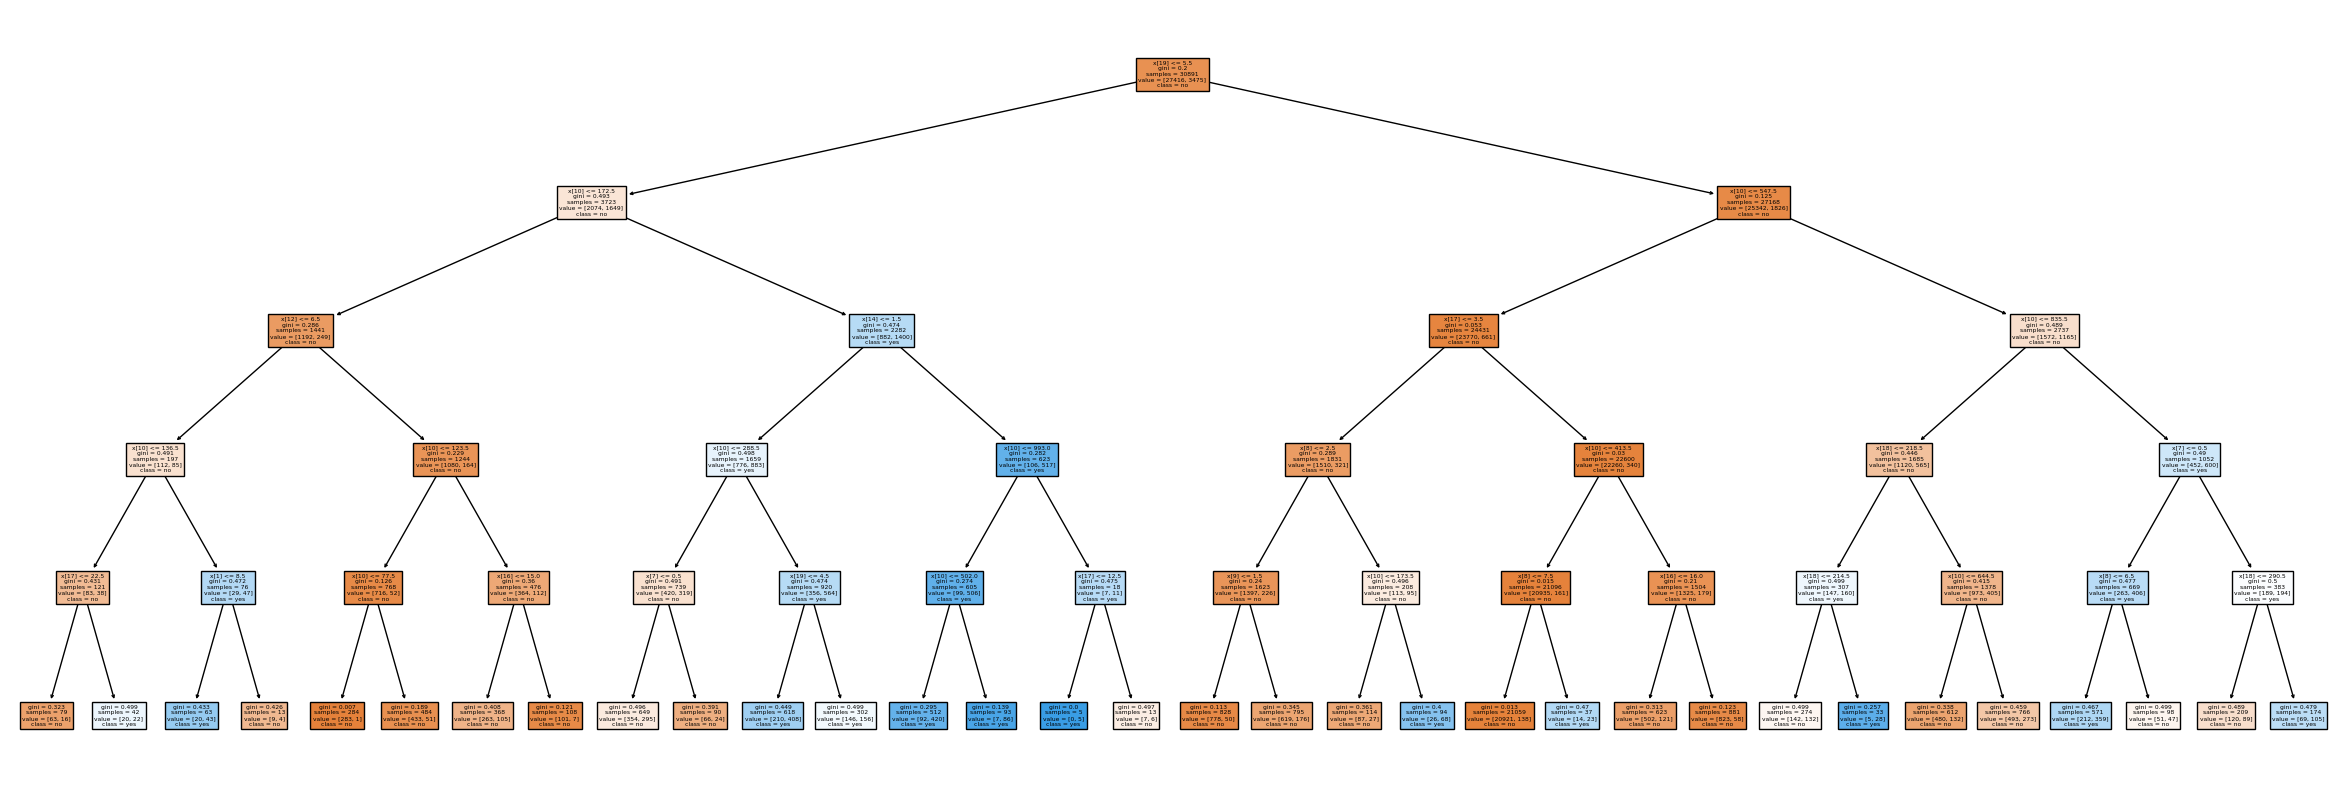

In [ ]:
plt.figure(figsize=(30,10))
plot_tree(dt,class_names=cn,filled=True)
plt.show()